<a href="https://colab.research.google.com/github/3m6d/Computer_vision/blob/main/CNNfromscratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, ZeroPadding2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_path = '/content/drive/MyDrive/Cat_dog_images.zip'

In [ ]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/data')

In [ ]:
base_dir = '/content/data/Cat_dog_images'
cat_dir = os.path.join(base_dir, 'cats')
dog_dir = os.path.join(base_dir, 'dogs')

In [ ]:
IMG_SIZE = 224 #standard size used in models architecture like VGG,Reslet

In [ ]:
# Prepare dataset and labels
def prepare_dataset(cat_dir, dog_dir):
    images, labels = [], []
    for img_name in os.listdir(cat_dir):
        img_path = os.path.join(cat_dir, img_name)
        img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = img_to_array(img) / 255.0  # Normalize means bringing them to 255 range to make modelling smoother
        images.append(img_array)
        labels.append(0)  # Class 0 for cats

    for img_name in os.listdir(dog_dir):
        img_path = os.path.join(dog_dir, img_name)
        img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
        labels.append(1)  # Class 1 for dogs

    return np.array(images), np.array(labels)

In [ ]:
X,y = prepare_dataset(cat_dir, dog_dir)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()

In [ ]:
#First convulation layer
# 32 is filter, of 3 by 3
# relu is activation function
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(ZeroPadding2D(padding = (1,1)))
model.add(AveragePooling2D(pool_size=(2,2)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Second convulation layer
# 64 is filter, of 3 by 3
# relu is activation function
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D(padding = (1,1)))
model.add(AveragePooling2D(pool_size=(2,2)))

In [ ]:
#Flatten the feature maps and add Dense layers
model.add(Flatten())

In [ ]:
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #binary classification

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_3 (ZeroPadding2D)     │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 112, 112, 32)        │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 110, 110, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_4 (ZeroPadding2D)     │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 56, 56, 64)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      51,380,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,400,129 (196.08 MB)

 Trainable params: 51,400,129 (196.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# for multiclass classification
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 949ms/step - accuracy: 0.4757 - loss: 6.6971 - val_accuracy: 0.4524 - val_loss: 1.2564
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5727 - loss: 0.8229 - val_accuracy: 0.5714 - val_loss: 0.6660
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6953 - loss: 0.6420 - val_accuracy: 0.5000 - val_loss: 0.6753
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7390 - loss: 0.5230 - val_accuracy: 0.5000 - val_loss: 0.7403
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8633 - loss: 0.3792 - val_accuracy: 0.5952 - val_loss: 0.7766
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9438 - loss: 0.2477 - val_accuracy: 0.5238 - val_loss: 1.1035
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8704 - loss: 0.2991 - val_accuracy: 0.6667 - val_loss: 0.8352
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9023 - loss: 0.2207 - val_accuracy: 0.6190 - val_loss: 0.862

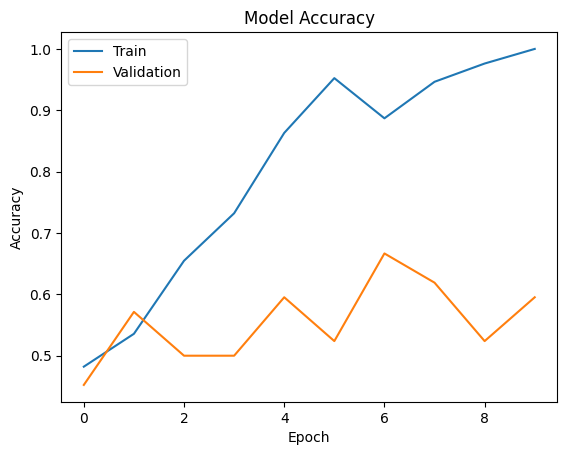

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
x_val_pred = (model.predict(X_val) > 0.5).astype("int32")


In [ ]:
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
y_val_pred = (model.predict(X_val) > 0.5).astype("int32")
train_cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Confusion Matrix - Training')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()